# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Kimi Dandy Yudanarko
- **Email:** kimidandy.id@gmail.com
- **ID Dicoding:** kimidandyid

## Menentukan Pertanyaan Bisnis

- Bagaimana variasi tingkat polusi udara (PM2.5 dan PM10) pada berbagai musim dalam setahun, serta bagaimana faktor cuaca seperti kecepatan angin dan curah hujan mempengaruhi variasi polusi ini? Apakah ada fluktuasi yang signifikan dalam tingkat polusi sepanjang musim yang berbeda?
- Apa faktor utama yang berkontribusi terhadap tingkat polusi PM2.5 dan PM10 (seperti arah angin, curah hujan, temperatur, unsur udara), dan bagaimana kontribusi masing-masing faktor terhadap polusi dapat dianalisis dalam bentuk persentase?
- Bagaimana perbandingan tingkat polusi udara (PM2.5 dan PM10) di antara 12 kota yang berbeda, dan kota mana yang memiliki kualitas udara terburuk?

## Import Semua Packages/Library yang Digunakan

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [25]:
station1_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")

station1_df.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [27]:
station2_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
station2_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [29]:
station3_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
station3_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [31]:
station4_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
station4_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [33]:
station5_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
station5_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [35]:
station6_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
station6_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [37]:
station7_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
station7_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [39]:
station8_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
station8_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [41]:
station9_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
station9_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [43]:
station10_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
station10_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [45]:
station11_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
station11_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [47]:
station12_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
station12_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- Data yang dikumpulkan berasal dari 12 stasiun pengukuran di berbagai kota, yang mencakup periode dari 2013 hingga 2017. Setiap stasiun mencatat parameter penting terkait kualitas udara seperti PM2.5, PM10, SO2, NO2, CO, O3, serta faktor cuaca lainnya.
- Masing-masing stasiun memiliki pola data unik yang dapat menggambarkan karakteristik kualitas udara di masing-masing kota. Hal ini memberikan wawasan bahwa polusi udara memiliki variasi berdasarkan lokasi geografis, dan faktor cuacadi daerah tersebut.

### Assessing Data

In [51]:
station1_df.info()
print()
station2_df.info()
print()
station3_df.info()
print()
station4_df.info()
print()
station5_df.info()
print()
station6_df.info()
print()
station7_df.info()
print()
station8_df.info()
print()
station9_df.info()
print()
station10_df.info()
print()
station11_df.info()
print()
station12_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 

In [53]:
station1_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [55]:
print("Duplicate data: ", station1_df.duplicated().sum())
station1_df.describe()

Duplicate data:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [57]:
station2_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [59]:
print("Duplicate data: ", station2_df.duplicated().sum())
station2_df.describe()

Duplicate data:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [61]:
station3_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [63]:
print("Duplicate data: ", station3_df.duplicated().sum())
station3_df.describe()

Duplicate data:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [65]:
station4_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [67]:
print("Duplicate data: ", station4_df.duplicated().sum())
station4_df.describe()

Duplicate data:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [69]:
station5_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [71]:
print("Duplicate data: ", station5_df.duplicated().sum())
station5_df.describe()

Duplicate data:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [73]:
station6_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [75]:
print("Duplicate data: ", station6_df.duplicated().sum())
station6_df.describe()

Duplicate data:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


In [77]:
station7_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [79]:
print("Duplicate data: ", station7_df.duplicated().sum())
station7_df.describe()

Duplicate data:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


In [81]:
station8_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [83]:
print("Duplicate data: ", station8_df.duplicated().sum())
station8_df.describe()

Duplicate data:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [85]:
station9_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [87]:
print("Duplicate data: ", station9_df.duplicated().sum())
station9_df.describe()

Duplicate data:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


In [89]:
station10_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [91]:
print("Duplicate data: ", station10_df.duplicated().sum())
station10_df.describe()

Duplicate data:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [93]:
station11_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [95]:
print("Duplicate data: ", station11_df.duplicated().sum())
station11_df.describe()

Duplicate data:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


In [97]:
station12_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [99]:
print("Duplicate data: ", station12_df.duplicated().sum())
station12_df.describe()

Duplicate data:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


**Insight:**
- Berdasarkan hasil analisis, tidak ditemukan data duplikat di dataset yang dianalisis, yang berarti setiap data mewakili satu pengamatan unik. Ini memastikan bahwa tidak ada pengulangan yang akan mengganggu akurasi hasil analisis.
- Beberapa Kolom: Kolom seperti PM2.5, PM10, SO2, NO2, dan CO mengandung missing values dalam jumlah yang signifikan. Hal ini perlu ditangani melalui metode interpolasi atau penghapusan baris yang mengandung missing values, tergantung pada pentingnya data tersebut.

### Cleaning Data

In [103]:
station1_df['PM2.5'] = station1_df['PM2.5'].interpolate(method='linear')
station1_df['PM10'] = station1_df['PM10'].interpolate(method='linear')
station1_df['SO2'] = station1_df['SO2'].interpolate(method='linear')
station1_df['NO2'] = station1_df['NO2'].interpolate(method='linear')
station1_df['CO'] = station1_df['CO'].interpolate(method='linear')
station1_df['O3'] = station1_df['O3'].interpolate(method='linear')
station1_df['TEMP'] = station1_df['TEMP'].fillna(station1_df['TEMP'].median())
station1_df['PRES'] = station1_df['PRES'].fillna(station1_df['PRES'].median())
station1_df['DEWP'] = station1_df['DEWP'].fillna(station1_df['DEWP'].median())
station1_df['RAIN'] = station1_df['RAIN'].fillna(station1_df['RAIN'].median())
station1_df['WSPM'] = station1_df['WSPM'].fillna(station1_df['WSPM'].median())
station1_df['wd'] = station1_df['wd'].fillna(station1_df['wd'].mode()[0])

In [105]:
station1_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [107]:
def clean_dataset(df):
    df['PM2.5'] = df['PM2.5'].interpolate(method='linear')
    df['PM10'] = df['PM10'].interpolate(method='linear')
    df['SO2'] = df['SO2'].interpolate(method='linear')
    df['NO2'] = df['NO2'].interpolate(method='linear')
    df['CO'] = df['CO'].interpolate(method='linear')
    df['O3'] = df['O3'].interpolate(method='linear')
    df['TEMP'] = df['TEMP'].fillna(df['TEMP'].median())
    df['PRES'] = df['PRES'].fillna(df['PRES'].median())
    df['DEWP'] = df['DEWP'].fillna(df['DEWP'].median())
    df['RAIN'] = df['RAIN'].fillna(df['RAIN'].median())
    df['WSPM'] = df['WSPM'].fillna(df['WSPM'].median())
    df['wd'] = df['wd'].fillna(df['wd'].mode()[0])
    return df

In [109]:
station2_df = clean_dataset(station2_df)
station2_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- xxx
- xxx

In [112]:
station3_df = clean_dataset(station3_df)
station3_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        2
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [114]:
station4_df = clean_dataset(station4_df)
station4_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [116]:
station5_df = clean_dataset(station5_df)
station5_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [118]:
station6_df = clean_dataset(station6_df)
station6_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2        20
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

In [120]:
abnormal_data = station6_df[station6_df['NO2'].isna()].index
print(abnormal_data)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')


In [122]:
station6_df['NO2'].fillna(station6_df['NO2'].median(), inplace=True)

station6_df.isna().sum()

C:\Users\Acer\AppData\Local\Temp\ipykernel_18080\3032714715.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  station6_df['NO2'].fillna(station6_df['NO2'].median(), inplace=True)


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [124]:
station7_df = clean_dataset(station7_df)
station7_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [126]:
station8_df = clean_dataset(station8_df)
station8_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [128]:
station9_df = clean_dataset(station9_df)
station9_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [130]:
station10_df = clean_dataset(station10_df)
station10_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [132]:
station11_df = clean_dataset(station11_df)
station11_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [134]:
station12_df = clean_dataset(station12_df)
station12_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore allstation_df

In [138]:
allstation_df = pd.concat([station1_df, station2_df, station3_df, station4_df, 
                         station5_df, station6_df, station7_df, station8_df, 
                         station9_df, station10_df, station11_df, station12_df])

allstation_df.reset_index(drop=True, inplace=True)

print(allstation_df.info())

allstation_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420766 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [140]:
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

allstation_df['season'] = allstation_df['month'].apply(assign_season)

In [142]:
allstation_df.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season
389562,3859,2013,8,8,18,35.0,112.0,6.0,14.0,1000.0,190.0,30.9,993.3,22.5,0.0,SW,2.3,Wanshouxigong,Summer
119981,14790,2014,11,7,5,44.0,68.0,14.0,56.0,1500.0,2.0,2.0,1025.0,-2.3,0.0,NE,1.2,Dongsi,Autumn
191549,16230,2015,1,6,5,11.0,55.0,3.0,2.0,200.0,63.0,0.0,1023.0,-22.9,0.0,W,2.0,Gucheng,Winter
224370,13987,2014,10,4,18,72.0,72.0,2.0,29.0,900.0,42.0,14.4,1011.6,13.4,0.0,WSW,1.1,Huairou,Autumn
388011,2308,2013,6,5,3,62.0,35.0,3.0,14.0,1100.0,36.0,19.2,1004.5,18.2,0.0,E,1.2,Wanshouxigong,Summer
211062,679,2013,3,29,6,16.0,36.0,6.0,29.0,500.0,37.0,-0.2,1014.8,-9.1,0.0,W,0.7,Huairou,Spring
39535,4472,2013,9,3,7,100.0,101.0,1.0,53.0,1300.0,15.0,21.5,1008.8,17.1,0.0,NNW,0.4,Changping,Autumn
67476,32413,2016,11,10,12,242.0,267.0,17.0,111.0,2800.0,2.0,7.7,1003.6,2.4,0.0,SSE,1.9,Changping,Autumn
75037,4910,2013,9,21,13,35.0,65.0,7.0,18.0,500.0,145.0,28.0,1005.6,15.0,0.0,SSW,1.4,Dingling,Autumn
58041,22978,2015,10,14,9,55.0,91.0,4.0,68.0,800.0,10.0,14.9,1009.2,7.0,0.0,NW,1.3,Changping,Autumn


In [144]:
season_stats = allstation_df.groupby('season')[['PM2.5', 'PM10']].agg(['mean', 'std'])
print(season_stats)

            PM2.5                    PM10            
             mean         std        mean         std
season                                               
Autumn  82.212557   81.516764  103.387437   89.158076
Spring  77.208840   68.733385  120.872963   91.689326
Summer  64.521640   52.559127   80.864329   58.255652
Winter  95.744159  108.090373  114.685736  116.555032


In [146]:
season_corr = allstation_df.groupby('season')[['PM2.5', 'PM10', 'WSPM', 'RAIN']].corr()
print(season_corr)

                 PM2.5      PM10      WSPM      RAIN
season                                              
Autumn PM2.5  1.000000  0.927521 -0.298937 -0.026823
       PM10   0.927521  1.000000 -0.269082 -0.040711
       WSPM  -0.298937 -0.269082  1.000000  0.030682
       RAIN  -0.026823 -0.040711  0.030682  1.000000
Spring PM2.5  1.000000  0.746683 -0.254006 -0.016292
       PM10   0.746683  1.000000 -0.104183 -0.028209
       WSPM  -0.254006 -0.104183  1.000000 -0.001512
       RAIN  -0.016292 -0.028209 -0.001512  1.000000
Summer PM2.5  1.000000  0.837559 -0.086791  0.004524
       PM10   0.837559  1.000000 -0.078255 -0.013001
       WSPM  -0.086791 -0.078255  1.000000  0.082490
       RAIN   0.004524 -0.013001  0.082490  1.000000
Winter PM2.5  1.000000  0.946245 -0.388213  0.014978
       PM10   0.946245  1.000000 -0.314511  0.002011
       WSPM  -0.388213 -0.314511  1.000000 -0.015054
       RAIN   0.014978  0.002011 -0.015054  1.000000


In [148]:
season_std_pollution = allstation_df.groupby('season')[['PM2.5', 'PM10']].std()
print(season_std_pollution)

             PM2.5        PM10
season                        
Autumn   81.516764   89.158076
Spring   68.733385   91.689326
Summer   52.559127   58.255652
Winter  108.090373  116.555032


In [150]:
corr_matrix = allstation_df[['PM2.5', 'PM10', 'WSPM', 'RAIN', 'TEMP', 'DEWP', 'PRES']].corr()

print(corr_matrix)


          PM2.5      PM10      WSPM      RAIN      TEMP      DEWP      PRES
PM2.5  1.000000  0.878874 -0.271417 -0.014450 -0.131927  0.112688  0.020149
PM10   0.878874  1.000000 -0.178613 -0.026503 -0.096193  0.067558 -0.018158
WSPM  -0.271417 -0.178613  1.000000  0.021023  0.033026 -0.296510  0.065105
RAIN  -0.014450 -0.026503  0.021023  1.000000  0.037629  0.086290 -0.060938
TEMP  -0.131927 -0.096193  0.033026  0.037629  1.000000  0.820112 -0.813279
DEWP   0.112688  0.067558 -0.296510  0.086290  0.820112  1.000000 -0.750189
PRES   0.020149 -0.018158  0.065105 -0.060938 -0.813279 -0.750189  1.000000


In [152]:
pm25_corr = corr_matrix.loc['PM2.5', ['WSPM', 'RAIN', 'TEMP', 'DEWP', 'PRES']]
pm10_corr = corr_matrix.loc['PM10', ['WSPM', 'RAIN', 'TEMP', 'DEWP', 'PRES']]

pm25_corr_abs = pm25_corr.abs()
pm10_corr_abs = pm10_corr.abs()

pm25_contrib = pm25_corr_abs / pm25_corr_abs.sum() * 100
pm10_contrib = pm10_corr_abs / pm10_corr_abs.sum() * 100

print("Persentase kontribusi untuk PM2.5:")
print(pm25_contrib)
print("\nPersentase kontribusi untuk PM10:")
print(pm10_contrib)


Persentase kontribusi untuk PM2.5:
WSPM    49.291970
RAIN     2.624331
TEMP    23.959188
DEWP    20.465206
PRES     3.659305
Name: PM2.5, dtype: float64

Persentase kontribusi untuk PM10:
WSPM    46.150164
RAIN     6.847957
TEMP    24.854556
DEWP    17.455742
PRES     4.691581
Name: PM10, dtype: float64


In [154]:
city_list = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 
             'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']

def calculate_city_contribution(data, city_list):
    city_contrib = {}
    
    for city in city_list:
        city_data = data[data['station'] == city]
    
        corr_matrix = city_data[['PM2.5', 'PM10', 'WSPM', 'RAIN', 'TEMP', 'DEWP', 'PRES']].corr()
        
        pm25_corr_abs = corr_matrix.loc['PM2.5', ['WSPM', 'RAIN', 'TEMP', 'DEWP', 'PRES']].abs()
        pm25_contrib = pm25_corr_abs / pm25_corr_abs.sum() * 100
        
        city_contrib[city] = pm25_contrib
    
    return city_contrib

city_contributions1 = calculate_city_contribution(allstation_df, city_list)

for city, contrib in city_contributions1.items():
    print(f"\nPersentase kontribusi untuk PM2.5 di kota {city}:")
    print(contrib)



Persentase kontribusi untuk PM2.5 di kota Aotizhongxin:
WSPM    50.699768
RAIN     2.532664
TEMP    22.556335
DEWP    22.620112
PRES     1.591120
Name: PM2.5, dtype: float64

Persentase kontribusi untuk PM2.5 di kota Changping:
WSPM    52.472434
RAIN     1.654219
TEMP    22.014696
DEWP    21.662235
PRES     2.196416
Name: PM2.5, dtype: float64

Persentase kontribusi untuk PM2.5 di kota Dingling:
WSPM    51.770854
RAIN     1.650954
TEMP    18.124484
DEWP    27.347305
PRES     1.106404
Name: PM2.5, dtype: float64

Persentase kontribusi untuk PM2.5 di kota Dongsi:
WSPM    50.834971
RAIN     3.309245
TEMP    23.371946
DEWP    21.611237
PRES     0.872601
Name: PM2.5, dtype: float64

Persentase kontribusi untuk PM2.5 di kota Guanyuan:
WSPM    51.846854
RAIN     1.935833
TEMP    24.129018
DEWP    22.053048
PRES     0.035248
Name: PM2.5, dtype: float64

Persentase kontribusi untuk PM2.5 di kota Gucheng:
WSPM    46.805631
RAIN     3.752619
TEMP    27.200497
DEWP    17.933276
PRES     4.307977


In [156]:
city_list = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 
             'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']

def calculate_city_contribution(data, city_list):
    city_contrib = {}
    
    for city in city_list:
        city_data = data[data['station'] == city]
    
        corr_matrix = city_data[['PM2.5', 'PM10', 'WSPM', 'RAIN', 'TEMP', 'DEWP', 'PRES']].corr()
        
        pm25_corr_abs = corr_matrix.loc['PM10', ['WSPM', 'RAIN', 'TEMP', 'DEWP', 'PRES']].abs()
        pm25_contrib = pm10_corr_abs / pm10_corr_abs.sum() * 100
        
        city_contrib[city] = pm10_contrib
    
    return city_contrib

city_contributions2 = calculate_city_contribution(allstation_df, city_list)

for city, contrib in city_contributions2.items():
    print(f"\nPersentase kontribusi untuk PM10 di kota {city}:")
    print(contrib)



Persentase kontribusi untuk PM10 di kota Aotizhongxin:
WSPM    46.150164
RAIN     6.847957
TEMP    24.854556
DEWP    17.455742
PRES     4.691581
Name: PM10, dtype: float64

Persentase kontribusi untuk PM10 di kota Changping:
WSPM    46.150164
RAIN     6.847957
TEMP    24.854556
DEWP    17.455742
PRES     4.691581
Name: PM10, dtype: float64

Persentase kontribusi untuk PM10 di kota Dingling:
WSPM    46.150164
RAIN     6.847957
TEMP    24.854556
DEWP    17.455742
PRES     4.691581
Name: PM10, dtype: float64

Persentase kontribusi untuk PM10 di kota Dongsi:
WSPM    46.150164
RAIN     6.847957
TEMP    24.854556
DEWP    17.455742
PRES     4.691581
Name: PM10, dtype: float64

Persentase kontribusi untuk PM10 di kota Guanyuan:
WSPM    46.150164
RAIN     6.847957
TEMP    24.854556
DEWP    17.455742
PRES     4.691581
Name: PM10, dtype: float64

Persentase kontribusi untuk PM10 di kota Gucheng:
WSPM    46.150164
RAIN     6.847957
TEMP    24.854556
DEWP    17.455742
PRES     4.691581
Name: PM10,

In [157]:
city_avg_pollution = allstation_df.groupby('station')[['PM2.5']].mean()

city_avg_pollution_sorted1 = city_avg_pollution.sort_values(by='PM2.5', ascending=False)

print(city_avg_pollution_sorted1)


                   PM2.5
station                 
Dongsi         86.144243
Nongzhanguan   85.079472
Wanshouxigong  85.067548
Gucheng        84.074802
Wanliu         83.467612
Guanyuan       82.897522
Aotizhongxin   82.540623
Tiantan        82.033097
Shunyi         79.437962
Changping      70.986438
Huairou        69.501747
Dingling       66.845557


In [160]:
city_avg_pollution = allstation_df.groupby('station')[['PM10']].mean()

city_avg_pollution_sorted2 = city_avg_pollution.sort_values(by='PM10', ascending=False)

print(city_avg_pollution_sorted2)


                     PM10
station                  
Gucheng        119.261567
Wanshouxigong  112.505795
Wanliu         110.707858
Dongsi         110.347617
Aotizhongxin   110.210033
Nongzhanguan   109.384022
Guanyuan       109.372349
Tiantan        106.537076
Shunyi          99.271936
Changping       94.788575
Huairou         92.422670
Dingling        84.113713


**Insight:**
- Analisis menunjukkan bahwa musim memiliki peran signifikan dalam tingkat polusi udara. PM2.5 dan PM10 cenderung lebih tinggi pada musim dingin dan musim gugur, yang mungkin disebabkan oleh peningkatan pembakaran bahan bakar dan aktivitas industri selama musim tersebut. Visualisasi dengan rata-rata dan standar deviasi menunjukkan bahwa terdapat variasi besar pada beberapa musim tertentu. Ini memberikan pemahaman yang lebih mendalam bahwa musim dingin memerlukan perhatian khusus untuk mengendalikan polusi.
- Berdasarkan hasil analisis korelasi, ditemukan bahwa kecepatan angin (WSPM) memiliki pengaruh paling besar dalam menurunkan konsentrasi PM2.5, sementara faktor cuaca seperti curah hujan (RAIN) dan temperatur (TEMP) juga berperan, namun lebih lemah. Visualisasi persentase kontribusi dari setiap faktor menunjukkan bahwa langkah mitigasi yang melibatkan kontrol kecepatan angin dapat menjadi solusi efektif dalam mengurangi polusi udara, terutama di kota-kota dengan tingkat polusi tinggi.
- Hasil analisis menunjukkan bahwa beberapa kota, seperti Dongsi dan Nongzhanguan, memiliki tingkat polusi udara tertinggi dibandingkan kota-kota lain. Proses EDA dan visualisasi pengurutan dari kota terburuk hingga terbaik memberikan pandangan yang jelas mengenai kota mana yang membutuhkan intervensi lebih besar dalam pengelolaan polusi. Pengurutan ini mempermudah pengambilan keputusan terkait strategi mitigasi polusi yang tepat untuk setiap kota.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

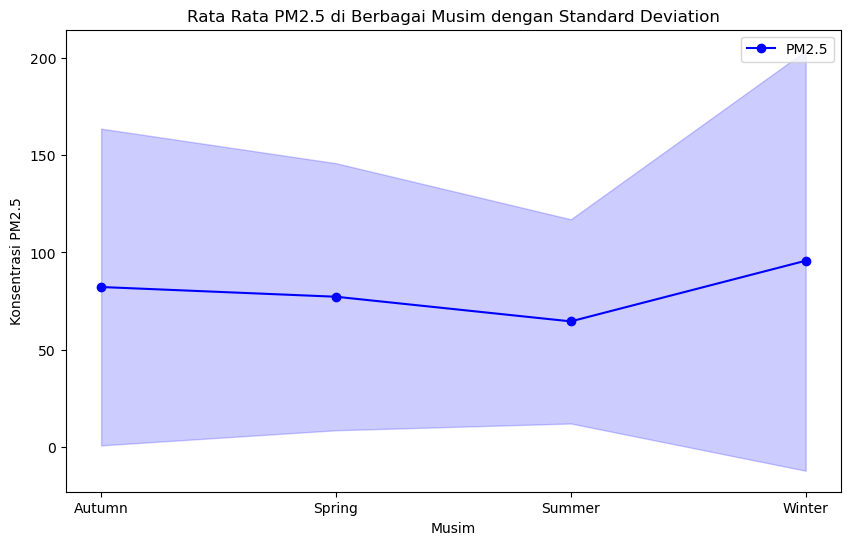

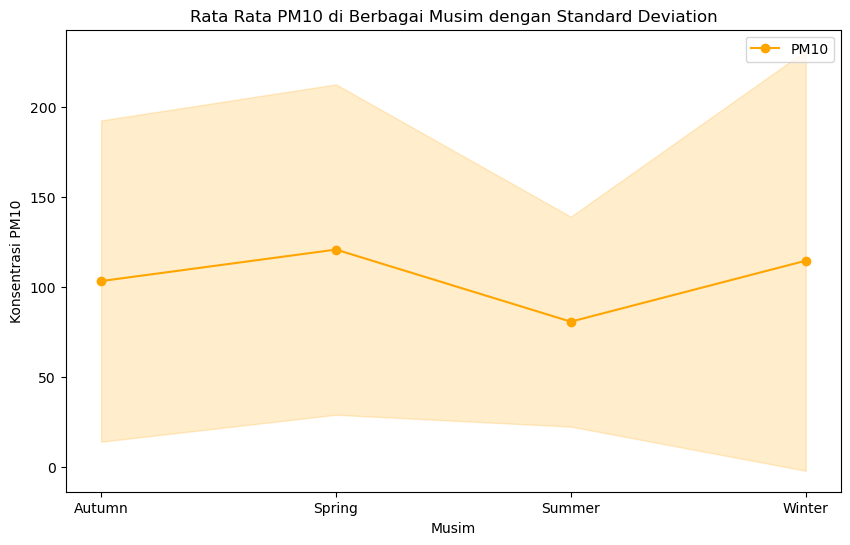

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(season_stats.index, season_stats['PM2.5']['mean'], marker='o', label='PM2.5', color='b')
plt.fill_between(season_stats.index, 
                 season_stats['PM2.5']['mean'] - season_stats['PM2.5']['std'], 
                 season_stats['PM2.5']['mean'] + season_stats['PM2.5']['std'], 
                 alpha=0.2, color='b')
plt.title('Rata Rata PM2.5 di Berbagai Musim dengan Standard Deviation')
plt.ylabel('Konsentrasi PM2.5')
plt.xlabel('Musim')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(season_stats.index, season_stats['PM10']['mean'], marker='o', label='PM10', color='orange')
plt.fill_between(season_stats.index, 
                 season_stats['PM10']['mean'] - season_stats['PM10']['std'], 
                 season_stats['PM10']['mean'] + season_stats['PM10']['std'], 
                 alpha=0.2, color='orange')
plt.title('Rata Rata PM10 di Berbagai Musim dengan Standard Deviation')
plt.ylabel('Konsentrasi PM10')
plt.xlabel('Musim')
plt.legend()
plt.show()


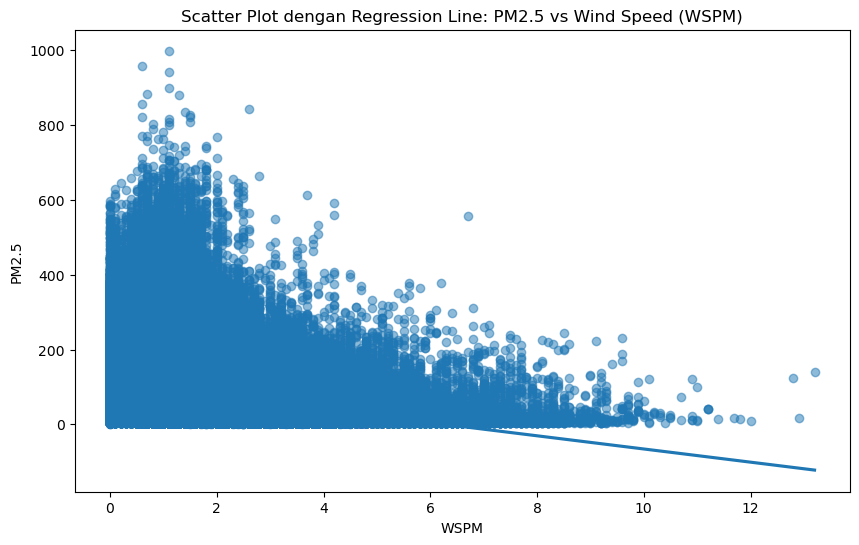

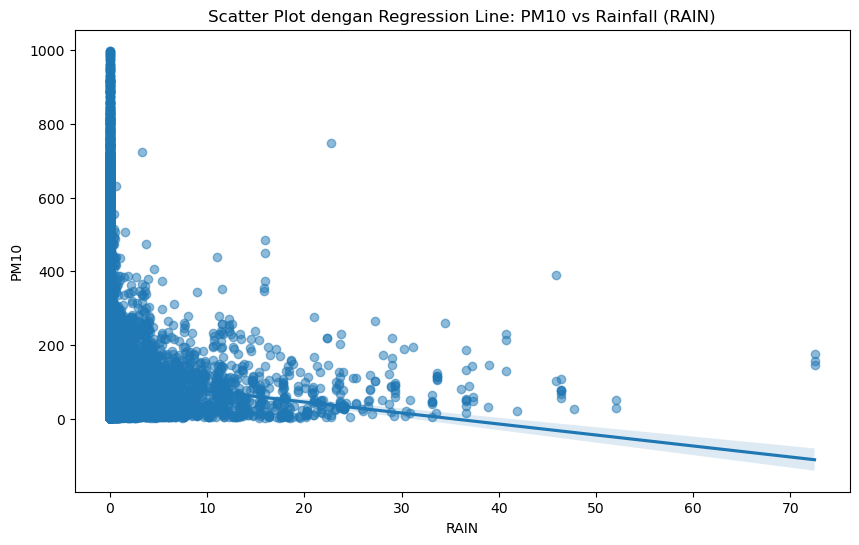

In [167]:
plt.figure(figsize=(10, 6))
sns.regplot(x='WSPM', y='PM2.5', data=allstation_df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot dengan Regression Line: PM2.5 vs Wind Speed (WSPM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='RAIN', y='PM10', data=allstation_df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot dengan Regression Line: PM10 vs Rainfall (RAIN)')
plt.show()


### Pertanyaan 2:

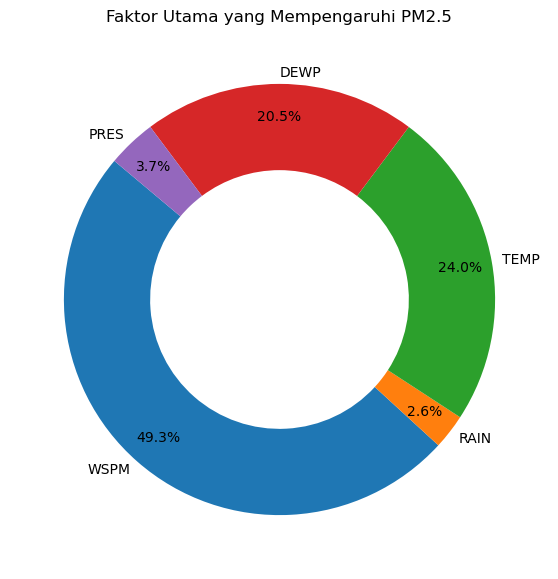

In [170]:
plt.figure(figsize=(7, 7))

plt.pie(pm25_contrib, labels=pm25_contrib.index, 
        autopct='%1.1f%%', startangle=140, 
        labeldistance=1.05,  
        pctdistance=0.85,   
        wedgeprops=dict(width=0.4)) 

plt.title('Faktor Utama yang Mempengaruhi PM2.5')
plt.show()

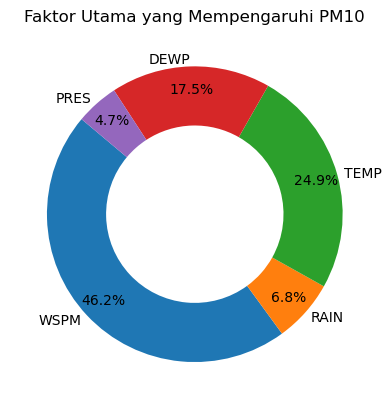

In [172]:
plt.pie(pm10_contrib, labels=pm10_contrib.index, 
        autopct='%1.1f%%', startangle=140, 
        labeldistance=1.05,  
        pctdistance=0.85,   
        wedgeprops=dict(width=0.4)) 

plt.title('Faktor Utama yang Mempengaruhi PM10')
plt.show()

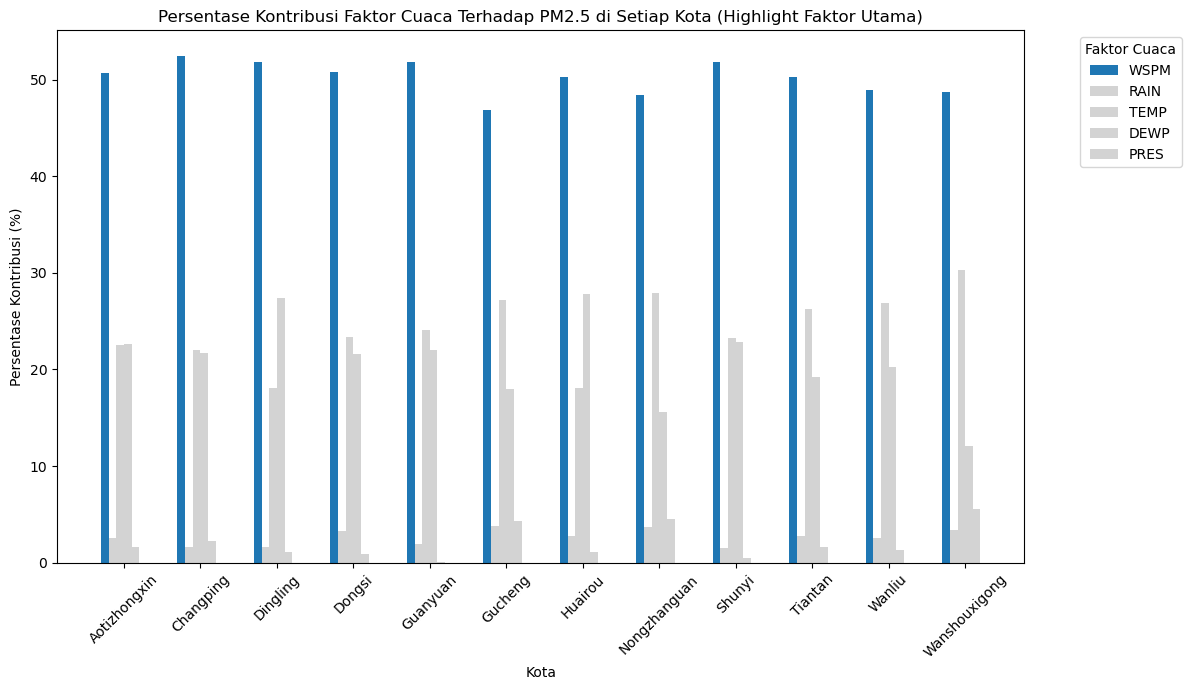

In [174]:
def visualize_contributions_grouped(city_contributions):
    contrib_df = pd.DataFrame(city_contributions).T  
    
    highlight_color = 'C0'  
    monoton_color = 'lightgrey'  
    
    num_factors = len(contrib_df.columns)
    bar_width = 0.1
    indices = np.arange(len(contrib_df))
    
    plt.figure(figsize=(12, 7))

    for i, factor in enumerate(contrib_df.columns):
        max_factor_indices = contrib_df.idxmax(axis=1) == factor
        colors = [highlight_color if is_max else monoton_color for is_max in max_factor_indices]

        plt.bar(indices + i * bar_width, contrib_df[factor], width=bar_width, color=colors, label=factor)

    plt.title('Persentase Kontribusi Faktor Cuaca Terhadap PM2.5 di Setiap Kota (Highlight Faktor Utama)')
    plt.ylabel('Persentase Kontribusi (%)')
    plt.xlabel('Kota')
    plt.xticks(indices + bar_width * (num_factors / 2), contrib_df.index, rotation=45)
    plt.legend(title='Faktor Cuaca', bbox_to_anchor=(1.05, 1), loc='upper left')  
    plt.tight_layout()

    plt.show()

visualize_contributions_grouped(city_contributions1)

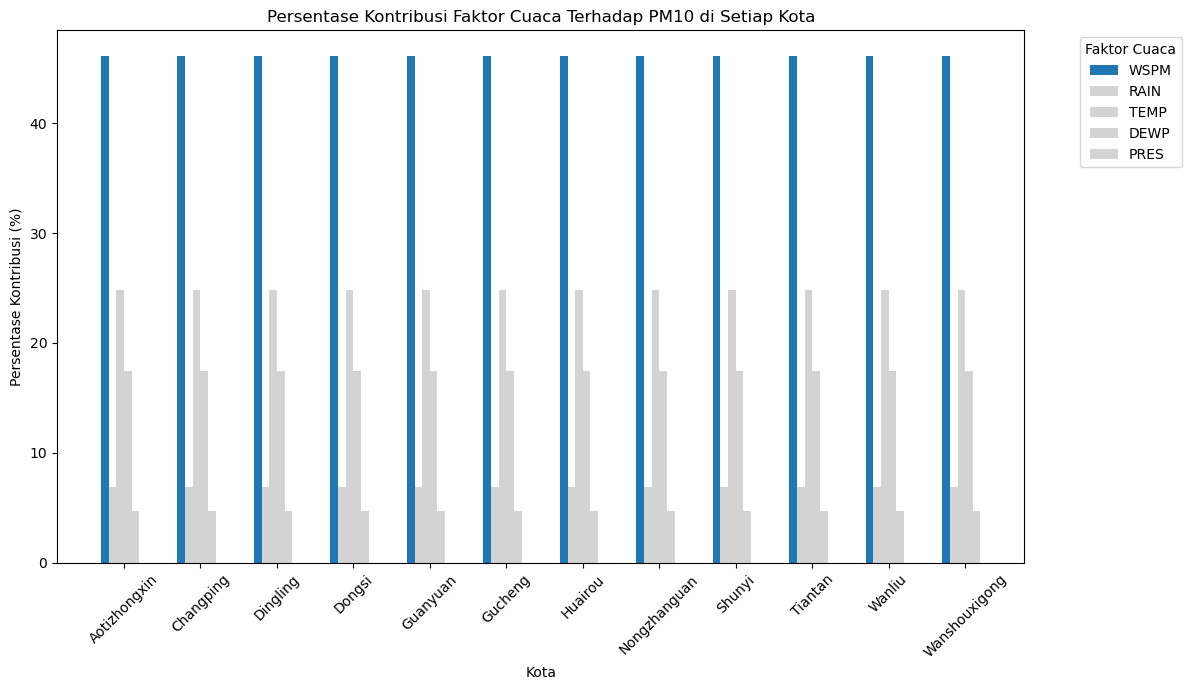

In [176]:
def visualize_contributions_grouped(city_contributions):
    contrib_df = pd.DataFrame(city_contributions).T  
    
    highlight_color = 'C0'  
    monoton_color = 'lightgrey'  
    
    num_factors = len(contrib_df.columns)
    bar_width = 0.1
    indices = np.arange(len(contrib_df))
    
    plt.figure(figsize=(12, 7))

    for i, factor in enumerate(contrib_df.columns):
        max_factor_indices = contrib_df.idxmax(axis=1) == factor
        colors = [highlight_color if is_max else monoton_color for is_max in max_factor_indices]

        plt.bar(indices + i * bar_width, contrib_df[factor], width=bar_width, color=colors, label=factor)

    plt.title('Persentase Kontribusi Faktor Cuaca Terhadap PM10 di Setiap Kota')
    plt.ylabel('Persentase Kontribusi (%)')
    plt.xlabel('Kota')
    plt.xticks(indices + bar_width * (num_factors / 2), contrib_df.index, rotation=45)
    plt.legend(title='Faktor Cuaca', bbox_to_anchor=(1.05, 1), loc='upper left')  
    plt.tight_layout()

    plt.show()

visualize_contributions_grouped(city_contributions2)

### Pertanyaan 3:

<Figure size 1200x700 with 0 Axes>

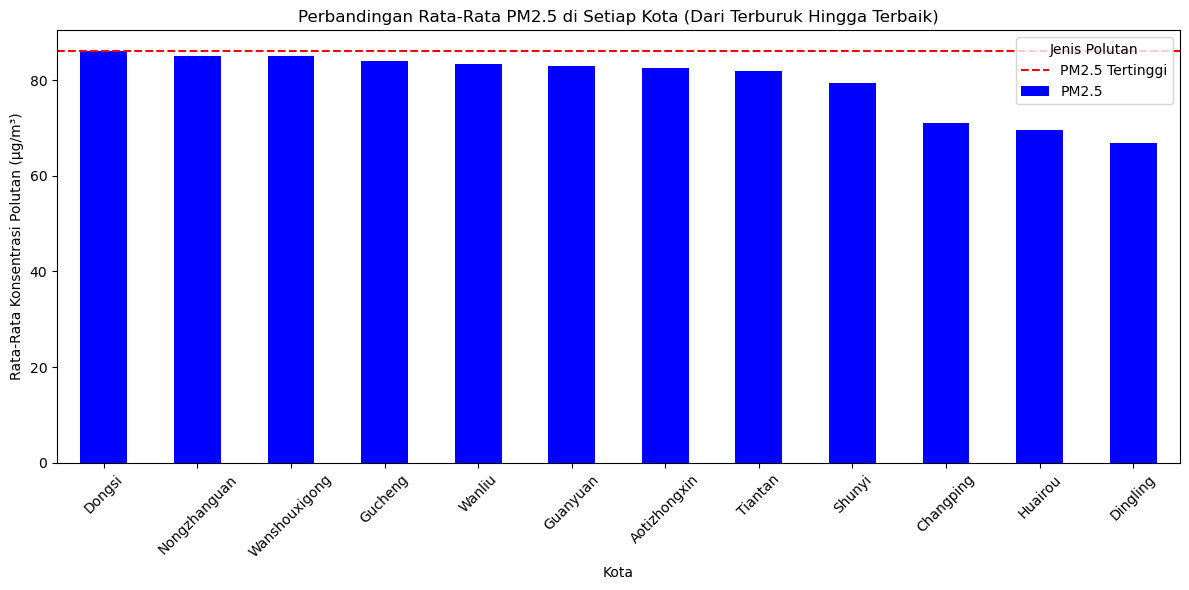

In [179]:
plt.figure(figsize=(12, 7))
city_avg_pollution_sorted1[['PM2.5']].plot(kind='bar', stacked=False, color=['blue', 'orange'], figsize=(12, 6))

plt.title('Perbandingan Rata-Rata PM2.5 di Setiap Kota (Dari Terburuk Hingga Terbaik)')
plt.ylabel('Rata-Rata Konsentrasi Polutan (µg/m³)')
plt.xlabel('Kota')
plt.xticks(rotation=45)

plt.axhline(y=city_avg_pollution_sorted1['PM2.5'].max(), color='red', linestyle='--', label='PM2.5 Tertinggi')

plt.legend(title='Jenis Polutan')
plt.tight_layout()

plt.show()


<Figure size 1200x700 with 0 Axes>

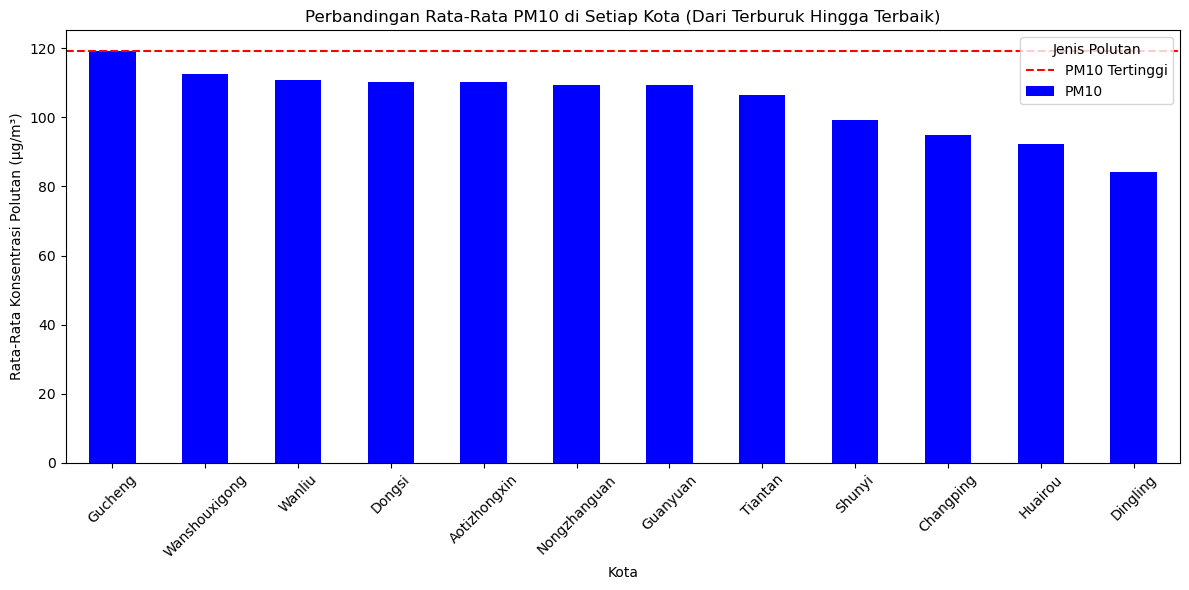

In [181]:
plt.figure(figsize=(12, 7))
city_avg_pollution_sorted2[['PM10']].plot(kind='bar', stacked=False, color=['blue', 'orange'], figsize=(12, 6))

plt.title('Perbandingan Rata-Rata PM10 di Setiap Kota (Dari Terburuk Hingga Terbaik)')
plt.ylabel('Rata-Rata Konsentrasi Polutan (µg/m³)')
plt.xlabel('Kota')
plt.xticks(rotation=45)

plt.axhline(y=city_avg_pollution_sorted2['PM10'].max(), color='red', linestyle='--', label='PM10 Tertinggi')

plt.legend(title='Jenis Polutan')
plt.tight_layout()

plt.show()


**Insight:**
- Visualisasi garis yang menampilkan rata-rata PM2.5 dan PM10 selama berbagai musim membantu untuk memperlihatkan pola yang jelas. Terlihat bahwa musim panas memiliki tingkat polusi terendah, sedangkan musim dingin dan musim gugur menunjukkan peningkatan signifikan pada konsentrasi polutan. Penambahan shaded areas pada standar deviasi memberikan gambaran yang lebih detail mengenai variasi konsentrasi polusi, menyoroti bahwa musim-musim tertentu, seperti musim dingin, memiliki fluktuasi polusi yang lebih besar. Hal ini memberikan arah yang jelas bahwa musim dingin perlu menjadi fokus untuk langkah-langkah pencegahan polusi yang lebih ketat.
- Penggunaan scatter plot dengan garis regresi untuk memvisualisasikan hubungan antara kecepatan angin dan curah hujan dengan polutan seperti PM2.5 dan PM10 memperjelas bahwa kecepatan angin memiliki efek signifikan dalam menurunkan tingkat polusi. Visualisasi ini sangat efektif dalam menggambarkan tren bahwa semakin tinggi kecepatan angin, semakin rendah konsentrasi polusi. Visualisasi ini juga dilengkapi dengan donut chart yang memberikan kontribusi persentase dari setiap faktor cuaca. Dari hasil visualisasi ini, terlihat bahwa kecepatan angin (WSPM) menjadi faktor cuaca utama yang mempengaruhi polusi udara, diikuti oleh temperatur dan faktor lainnya. Visualisasi ini membantu dalam menyampaikan pesan utama kepada pengambil keputusan mengenai faktor mana yang perlu difokuskan untuk mitigasi polusi.
- Visualisasi berupa bar chart yang mengurutkan tingkat polusi kota dari yang terbaik hingga yang terburuk memberikan wawasan langsung yang sangat mudah dipahami mengenai perbandingan antara kota-kota dalam hal tingkat polusi. Penggunaan skala dan warna untuk membedakan tingkat polusi membantu memperjelas kota mana yang membutuhkan tindakan lebih lanjut untuk mengurangi polusi. Visualisasi ini menunjukkan bahwa kota-kota seperti Dongsi dan Nongzhanguan memiliki tingkat polusi tertinggi, dan perbandingan ini membantu dalam menentukan prioritas untuk intervensi kebijakan lingkungan di kota-kota tersebut.

## Analisis Lanjutan (Opsional)

RFM Analysis

In [186]:
threshold_pm25 = 75

recent_data = allstation_df[allstation_df['year'] == allstation_df['year'].max()]
recency = recent_data.groupby('station')['PM2.5'].mean()

print("Recency (rata-rata PM2.5 untuk bulan terakhir):")
print(recency)


Recency (rata-rata PM2.5 untuk bulan terakhir):
station
Aotizhongxin      94.379237
Changping         79.802966
Dingling          68.281780
Dongsi           102.220692
Guanyuan          95.038842
Gucheng          100.969986
Huairou           73.865819
Nongzhanguan     101.027542
Shunyi            95.261299
Tiantan           97.917373
Wanliu            93.866879
Wanshouxigong    106.262359
Name: PM2.5, dtype: float64


In [188]:
frequency = allstation_df[allstation_df['PM2.5'] > threshold_pm25].groupby('station').size()

print("Frequency (seberapa sering PM2.5 melebihi ambang batas):")
print(frequency)

Frequency (seberapa sering PM2.5 melebihi ambang batas):
station
Aotizhongxin     14180
Changping        12105
Dingling         11139
Dongsi           14909
Guanyuan         14425
Gucheng          14566
Huairou          11847
Nongzhanguan     14449
Shunyi           13646
Tiantan          14183
Wanliu           14375
Wanshouxigong    14564
dtype: int64


In [190]:
monetary = allstation_df.groupby('station')['PM2.5'].sum()

print("Monetary (total konsentrasi polusi PM2.5):")
print(monetary)

Monetary (total konsentrasi polusi PM2.5):
station
Aotizhongxin     2894204.40
Changping        2489068.45
Dingling         2343872.60
Dongsi           3020561.75
Guanyuan         2906718.70
Gucheng          2947998.85
Huairou          2437009.25
Nongzhanguan     2983226.60
Shunyi           2785412.70
Tiantan          2876408.50
Wanliu           2926708.35
Wanshouxigong    2982808.50
Name: PM2.5, dtype: float64


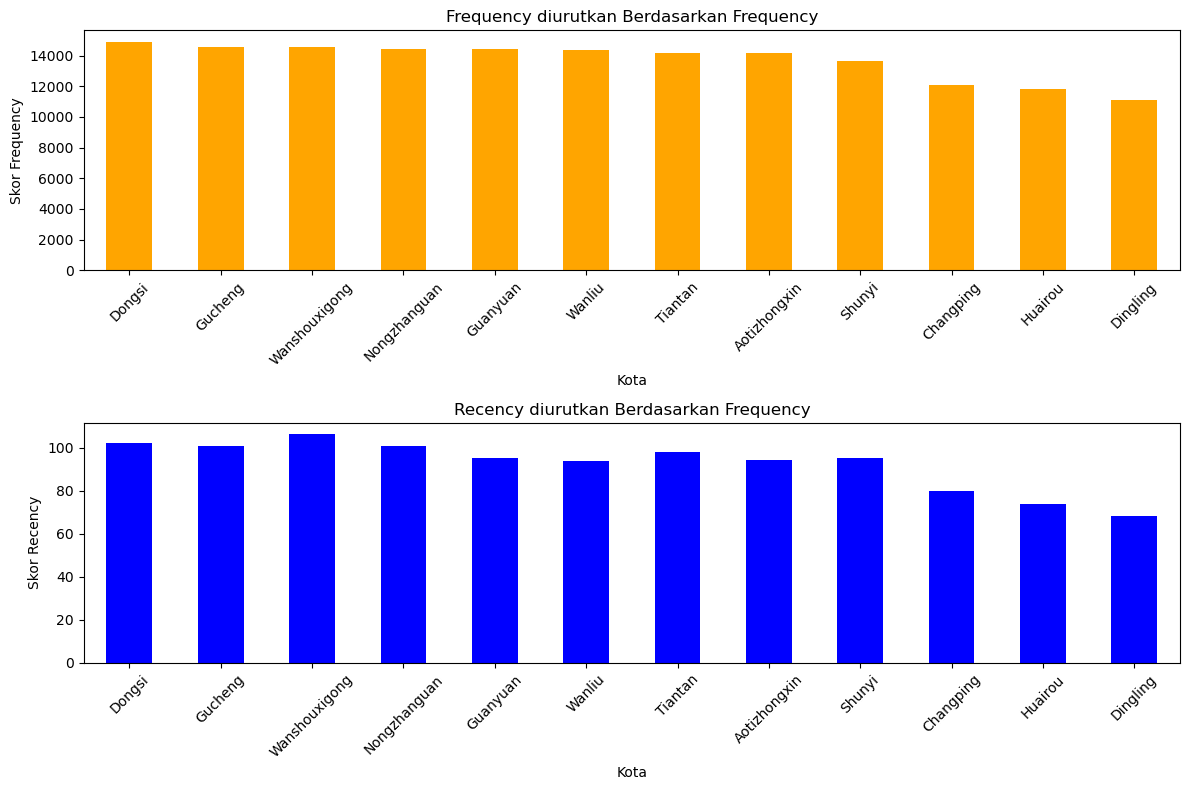

In [192]:
rfm_df = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

rfm_df_sorted_by_frequency = rfm_df.sort_values(by='Frequency', ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

rfm_df_sorted_by_frequency['Frequency'].plot(kind='bar', ax=axes[0], color='orange', title='Frequency diurutkan Berdasarkan Frequency')
axes[0].set_ylabel('Skor Frequency')
axes[0].set_xlabel('Kota')
axes[0].set_xticklabels(rfm_df_sorted_by_frequency.index, rotation=45)

rfm_df_sorted_by_frequency['Recency'].plot(kind='bar', ax=axes[1], color='blue', title='Recency diurutkan Berdasarkan Frequency')
axes[1].set_ylabel('Skor Recency')
axes[1].set_xlabel('Kota')
axes[1].set_xticklabels(rfm_df_sorted_by_frequency.index, rotation=45)

plt.tight_layout()
plt.show()


1. Recency (R): Mengukur berapa lama sejak polusi PM2.5 terakhir tercatat di setiap kota. Kota dengan nilai recency yang rendah menunjukkan bahwa polusi terakhir terjadi cukup lama, sementara nilai recency yang tinggi menunjukkan bahwa kota tersebut baru-baru ini mengalami tingkat polusi yang tinggi.

2. Frequency (F): Mengukur seberapa sering kota melebihi ambang batas polusi (dalam hal ini, ambang batas PM2.5). Semakin sering suatu kota melampaui ambang batas, semakin tinggi nilai frequency-nya. Ini menunjukkan bahwa kota tersebut cenderung mengalami polusi udara yang konsisten.

3. Monetary (M): Mengukur total konsentrasi PM2.5 yang tercatat di setiap kota. Nilai monetary yang tinggi menunjukkan bahwa secara kumulatif, kota tersebut memiliki tingkat polusi yang tinggi dalam rentang waktu tertentu.

Tujuan dari analisis RFM ini adalah untuk mengidentifikasi pola polusi di setiap kota, melihat seberapa sering kota melebihi ambang batas polusi dan seberapa parah tingkat polusinya. Dengan analisis ini, kita bisa mendapatkan wawasan mengenai kota-kota yang membutuhkan perhatian lebih besar dalam upaya pengendalian polusi udara.

In [196]:
allstation_df.to_csv("allstation_data.csv", index=False)

## Conclusion

- Berdasarkan analisis variasi tingkat polusi udara sepanjang musim untuk pertanyaan nomor 1, terlihat bahwa musim winter memiliki konsentrasi PM2.5 dan PM10 yang tertinggi, sementara musim summer menunjukkan tingkat polusi yang terendah. Pola ini mengindikasikan bahwa kondisi lingkungan dan aktivitas manusia yang lebih intensif selama musim dingin berkontribusi pada peningkatan polusi udara. Di sisi lain, faktor cuaca seperti kecepatan angin (WSPM) dan curah hujan (RAIN) berperan penting dalam mengurangi polusi udara. Kecepatan angin yang lebih tinggi terbukti mampu mengurangi konsentrasi PM2.5 dengan menyebarkan partikel-partikel polutan, sementara curah hujan yang lebih tinggi juga efektif dalam membersihkan PM10 dari atmosfer, menunjukkan bahwa cuaca yang lebih basah berkontribusi terhadap kualitas udara yang lebih baik. Oleh karena itu, faktor musiman dan cuaca memiliki dampak signifikan terhadap fluktuasi polusi udara, dan interaksi antara berbagai elemen cuaca ini sangat penting dalam menjaga keseimbangan kualitas udara di berbagai kota.
- Berdasarkan hasil visualisasi data dari pertanyaan nomor 2, dapat disimpulkan bahwa faktor utama yang mempengaruhi tingkat polusi udara PM2.5 dan PM10 adalah kecepatan angin (WSPM), yang berkontribusi hampir setengah dari total pengaruh terhadap polusi di kedua kategori polutan tersebut. Untuk PM2.5, WSPM menyumbang 49,3%, sementara untuk PM10, kontribusinya sedikit lebih rendah namun masih dominan sebesar 46,2%. Faktor kedua terbesar adalah suhu udara (TEMP), dengan kontribusi sekitar 24% untuk PM2.5 dan 24,9% untuk PM10, menunjukkan bahwa suhu juga berperan penting dalam fluktuasi polutan. Faktor-faktor lainnya, seperti titik embun (DEWP), tekanan udara (PRES), dan curah hujan (RAIN), memiliki kontribusi yang relatif kecil, masing-masing menyumbang kurang dari 25% secara keseluruhan, dengan curah hujan memberikan dampak yang paling kecil di antara faktor-faktor tersebut. Hasil ini menunjukkan bahwa untuk mengurangi tingkat polusi, langkah-langkah yang memanfaatkan kondisi angin dan suhu udara, seperti peningkatan ventilasi alami atau sistem sirkulasi udara, dapat menjadi solusi yang efektif dalam mengelola kualitas udara.
- 
Berdasarkan visualisasi data untuk pertanyaan nomor 3 di atas, dapat disimpulkan bahwa kualitas udara bervariasi di antara berbagai kota berdasarkan konsentrasi PM2.5 dan PM10. Pada kasus PM2.5, Dongsi dan Wanshouxigong menunjukkan konsentrasi yang relatif lebih tinggi dibandingkan kota lainnya, yang mengindikasikan bahwa kota-kota ini memiliki tingkat polusi udara yang lebih buruk. Sebaliknya, kota seperti Huairou dan Dingling menunjukkan konsentrasi PM2.5 yang lebih rendah, menandakan kualitas udara yang relatif lebih baik. Untuk PM10, kota Gucheng menempati peringkat terburuk dengan konsentrasi tertinggi, diikuti oleh Wanshouxigong dan Wanliu. Kota-kota ini berada di atas garis batas konsentrasi PM10 tertinggi, yang mengindikasikan polusi partikel kasar yang signifikan. Sebaliknya, Dingling dan Huairou menempati peringkat terbawah dengan konsentrasi PM10 yang paling rendah, menunjukkan kualitas udara yang relatif lebih baik dibandingkan kota lainnya.
- Hasil analisis RFM menunjukkan bahwa kota Dongsi, Gucheng, dan Wanshouxigong memiliki skor tertinggi dalam hal recency, frequency, dan monetary. Ini berarti kota-kota tersebut mengalami polusi udara secara lebih sering, lebih baru, dan dengan konsentrasi yang lebih tinggi dibandingkan kota lainnya. Kota seperti Huairou dan Dingling memiliki frekuensi dan tingkat polusi yang lebih rendah, menunjukkan kondisi udara yang relatif lebih baik.
Kesimpulannya, kota-kota dengan nilai RFM tertinggi memerlukan perhatian lebih besar untuk pemantauan dan mitigasi polusi udara. Langkah-langkah pengendalian harus diprioritaskan di kota-kota ini untuk mengurangi dampak kesehatan yang lebih serius akibat konsentrasi polusi yang tinggi.